In [2]:
import nmresearch as nmr
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from nmresearch.interface.engineering import PulseProgram

In [4]:
c1 = .05
c2 = 0.01
d3 = 4
p1 = 1.1

t1 = d3*(1+c1+2*c2) - p1/2
t1p = 2*d3*(1-c1+2*c2) - p1
t2 = d3*(1-c2) - p1
t3 = 2*d3*(1-c2) - p1


wei16Time = [
    t1,
    t2,
    t3,
    t2,
    t1p,
    t2,
    t3,
    t2,
    2*t1,
    t2,
    t3,
    t2,
    t1p,
    t2,
    t3,
    t2,
    t1,
]
wei16 = PulseProgram("0110011023322332", wei16Time)

In [5]:
wei16.data_frame()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
X,0,0,-1,0,0,0,1,0,0,0,1,0,0,0,-1,0,0
Y,0,1,0,-1,0,1,0,-1,0,-1,0,1,0,-1,0,1,0
Z,1,0,0,0,-1,0,0,0,1,0,0,0,-1,0,0,0,1


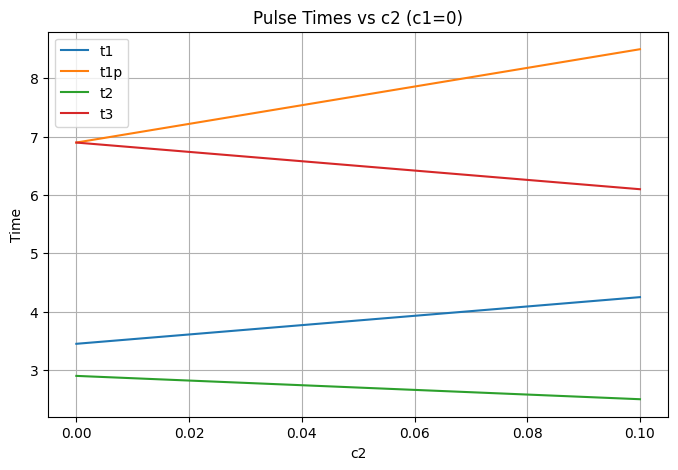

In [15]:
def compute_t1(cnst1, cnst2, d3=4, p1=1.1):
    return d3 * (1 + cnst1 + 2 * cnst2) - p1 / 2

def compute_t1p(cnst1, cnst2, d3=4, p1=1.1):
    return 2 * d3 * (1 - cnst1 + 2 * cnst2) - p1

def compute_t2(cnst1, cnst2, d3=4, p1=1.1):
    return d3 * (1 - cnst2) - p1

def compute_t3(cnst1, cnst2, d3=4, p1=1.1):
    return 2 * d3 * (1 - cnst2) - p1

# Sweep c2 from 0 to 0.1
c2_values = np.linspace(0, 0.1, 100)
c1_val = 0

t1_vals = [compute_t1(c1_val, c2) for c2 in c2_values]
t1p_vals = [compute_t1p(c1_val, c2) for c2 in c2_values]
t2_vals = [compute_t2(c1_val, c2) for c2 in c2_values]
t3_vals = [compute_t3(c1_val, c2) for c2 in c2_values]

plt.figure(figsize=(8, 5))
plt.plot(c2_values, t1_vals, label='t1')
plt.plot(c2_values, t1p_vals, label='t1p')
plt.plot(c2_values, t2_vals, label='t2')
plt.plot(c2_values, t3_vals, label='t3')
plt.xlabel('c2')
plt.ylabel('Time')
plt.title('Pulse Times vs c2 (c1=0)')
plt.legend()
plt.grid(True)
plt.show()

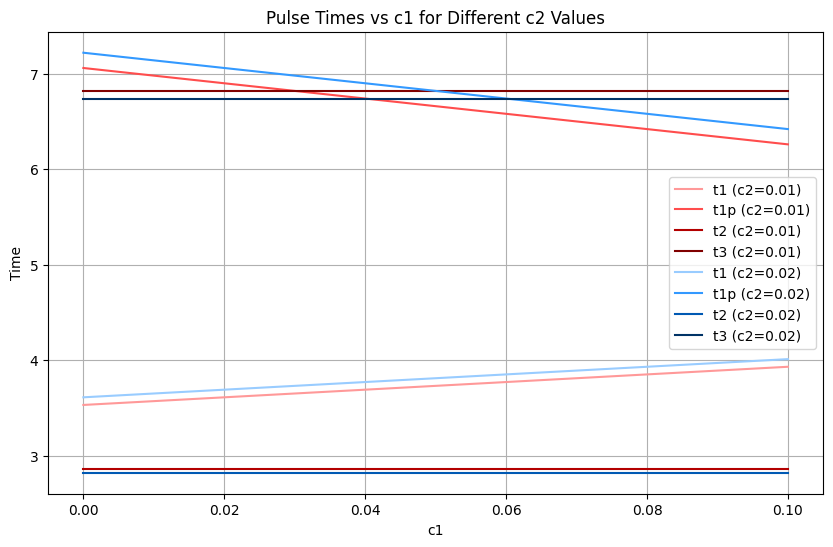

In [19]:
# Sweep c1 from 0 to 0.1
c1_values = np.linspace(0, 0.1, 100)
c2_cases = [0.01, 0.02]

    
# Plot all curves in the same figure with color coding for c2 cases
plt.figure(figsize=(10, 6))

colors = {
    0.01: ['#ff9999', '#ff4d4d', '#b30000', '#800000'],  # light to dark reds
    0.02: ['#99ccff', '#3399ff', '#0059b3', '#003366']   # light to dark blues
}
labels = ['t1', 't1p', 't2', 't3']

for idx, c2_case in enumerate(c2_cases):
    t1_vals = [compute_t1(c1, c2_case) for c1 in c1_values]
    t1p_vals = [compute_t1p(c1, c2_case) for c1 in c1_values]
    t2_vals = [compute_t2(c1, c2_case) for c1 in c1_values]
    t3_vals = [compute_t3(c1, c2_case) for c1 in c1_values]
    curve_vals = [t1_vals, t1p_vals, t2_vals, t3_vals]
    for j, vals in enumerate(curve_vals):
        plt.plot(
            c1_values, vals,
            color=colors[c2_case][j],
            label=f'{labels[j]} (c2={c2_case})'
        )

plt.xlabel('c1')
plt.ylabel('Time')
plt.title('Pulse Times vs c1 for Different c2 Values')
plt.legend()
plt.grid(True)
plt.show()

In [12]:
t1p

6.66

In [13]:
t2

2.86

In [14]:
t3

6.82

In [7]:
wei16.avg_ham(tP=1.1)

' 0.017 rZ + 0.000 Dy + 0.010 Dz'

In [8]:
wei16.k_vector()
wei16.k_vector(tP=1.1)

array([[0.        ],
       [0.        ],
       [0.01666667]])

In [9]:
wei16.L_vector()
wei16.L_vector(tP=1.1)

array([[0.33],
       [0.33],
       [0.34]])

In [10]:
wei16.chirality_operator1()

array([0., 0., 0.])

In [11]:
wei16.parity_operator1()

array([0., 0., 0.])